In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
ecg_data = pd.read_csv('/Users/jinyanwei/Desktop/ecgcp.csv')

In [41]:
ecg = {}
ecg['Subject'] = ['331C', '329C', '328C', '332T', '330T', '378T', '327T']
for i in range(len(ecg['Subject'])):
    ecg[f"{ecg['Subject'][i]}"] = ecg_data.iloc[i*4: (i+1)*4, :].reset_index(drop=True)
    for b in range(4):
        if ecg[f"{ecg['Subject'][i]}"]['Q-T_interval'][b] >= ecg[f"{ecg['Subject'][i]}"]['R-R_interval'][b]:
            ecg[f"{ecg['Subject'][i]}"].iloc[b] = [np.nan for n in range(5)]
    #display(ecg[f"{ecg['Subject'][i]}"])

ecg['Group'] = ['Control', 'Test']
ecg['Control'] = pd.DataFrame()
ecg['Test'] = pd.DataFrame()
for i in range(4):
    row_mean_c = pd.DataFrame(pd.concat([ecg['331C'].iloc[i:i+1, :], ecg['329C'].iloc[i:i+1, :], ecg['328C'].iloc[i:i+1, :]], ignore_index=True).mean()).T
    ecg['Control'] = pd.concat([ecg['Control'], row_mean_c], ignore_index=True)
    row_mean_t = pd.DataFrame(pd.concat([ecg['332T'].iloc[i:i+1, :], ecg['330T'].iloc[i:i+1, :], ecg['378T'].iloc[i:i+1, :], ecg['327T'].iloc[i:i+1, :]], ignore_index=True).mean()).T
    ecg['Test'] = pd.concat([ecg['Test'], row_mean_t], ignore_index=True)

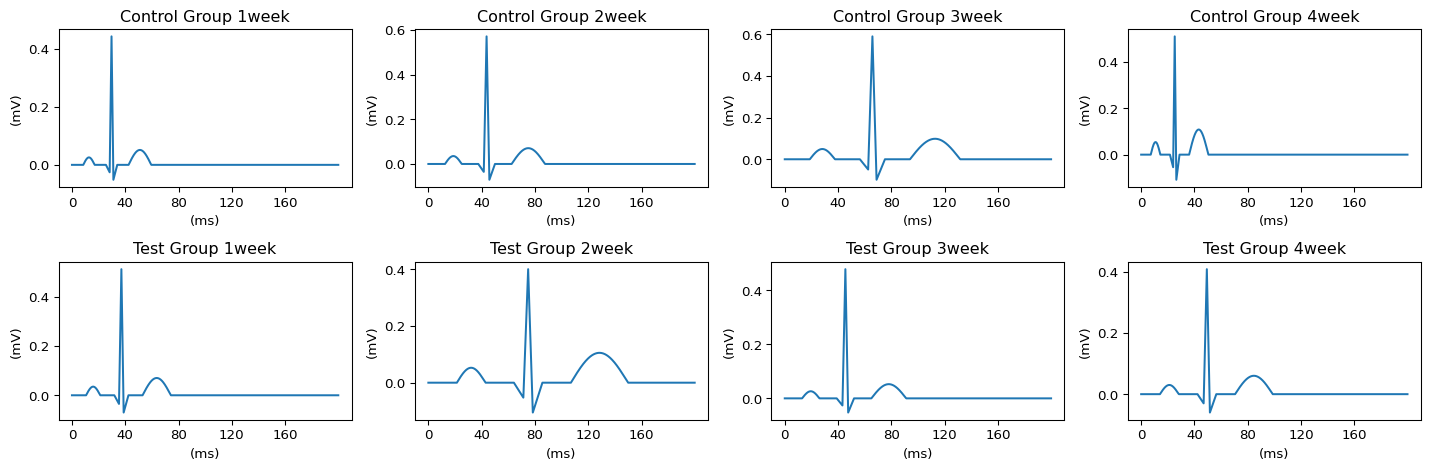

In [76]:
def get_axs(i, j):
    df = ecg[f"{ecg['Group'][i]}"]
    if df['R-R_interval'][j] > df['Q-T_interval'][j]:
        p_interval = int((df['R-R_interval'][j] - df['Q-T_interval'][j]))
        p_start = p_interval
        p_end = int(p_start + p_interval)
        p = np.linspace(0, 3.14, p_interval + 1)
        p_peak = df['T_peak'][j] / 2
        p_wave = np.sin(p) * p_peak
        ecg[f"{ecg['Group'][i]}_line"][j, p_start : p_end + 1] = p_wave
        q_start = int(3 * p_interval)#int(df['R-R_interval'][0] - df['Q-T_interval'][0])
        s_end = int(q_start + p_interval)#int(q_start + (df['Q-T_interval'][0] - df['S-T_interval'][0]))
        r_site = int((q_start + s_end) / 2)
        r_peak = df['R_peak'][j]
        q_site = int(q_start + 2 * (r_site-q_start) / 3)
        q_peak = -(df['T_peak'][j] / 2)
        q1 = np.linspace(0, q_peak, q_site - q_start + 1)
        ecg[f"{ecg['Group'][i]}_line"][j, q_start : q_site + 1] = q1
        r1 = np.linspace(q_peak, r_peak, r_site - q_site + 1)
        ecg[f"{ecg['Group'][i]}_line"][j, q_site : r_site + 1] = r1
        s_site = int(r_site + (s_end - r_site) / 3)
        s_peak = -df['T_peak'][j]
        r2 = np.linspace(r_peak, s_peak, s_site - r_site + 1)
        ecg[f"{ecg['Group'][i]}_line"][j, r_site : s_site + 1] = r2
        s2 = np.linspace(s_peak, 0, s_end - s_site + 1)
        ecg[f"{ecg['Group'][i]}_line"][j, s_site : s_end + 1] = s2
        t_start = int(s_end + (q_start - p_end))
        t_interval = int(2 * (df['R-R_interval'][j] - df['Q-T_interval'][j]))
        t_end = int(t_start + t_interval)
        t = np.linspace(0, 3.14, t_interval + 1)
        t_peak = df['T_peak'][j]
        t_wave = np.sin(t) * t_peak
        ecg[f"{ecg['Group'][i]}_line"][j, t_start : t_end + 1] = t_wave

        axs[i, j].plot(ecg[f"{ecg['Group'][i]}_line"][j])
        axs[i, j].set_xticks(np.arange(0, 2000, 400))
        axs[i, j].set_xticklabels([int(x) for x in np.arange(0, 2000, 400) / 10])
        axs[i, j].set_title(f"{ecg['Group'][i]} Group {j+1}week")
        axs[i, j].set_ylabel('(mV)')
        axs[i, j].set_xlabel('(ms)')#, x=1, y=0, ha='right', va='top'
    return

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 5), dpi=96)
fig.subplots_adjust(hspace=0.5)
for i in range(2):
    ecg[f"{ecg['Group'][i]}_line"] = np.zeros((4,2000))
    #print(f"{ecg['Group'][i]}_line")
    for j in range(4):
        get_axs(i, j)
plt.tight_layout()
plt.show()

In [79]:
import cv2
import numpy as np

In [107]:
image331C1 = cv2.imread('/Users/jinyanwei/Desktop/331C1.png', 0) 
print(image331C1.shape)
image329C1 = cv2.imread('/Users/jinyanwei/Desktop/329C1.png', 0)
print(image329C1.shape)

(96, 294)
(94, 284)


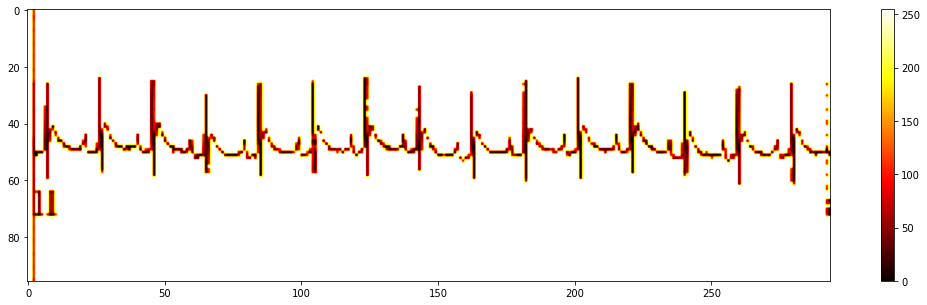

In [110]:
import matplotlib.pyplot as plt
data = image331C1
np.savetxt('331C1.csv', data, delimiter=',', fmt='%d')
data[np.where(data > 100)] = 255
plt.figure(figsize=(18,5))
plt.imshow(data, cmap='hot', aspect='auto')
plt.colorbar()
plt.show()

In [100]:
data

array([[255, 179,  94, ..., 255, 255, 255],
       [255, 179,  94, ..., 255, 255, 255],
       [255, 171,  77, ..., 207, 207, 207],
       ...,
       [255, 179,  94, ..., 255, 255, 255],
       [255, 179,  94, ..., 255, 255, 255],
       [255, 168,  72, ..., 194, 194, 194]], dtype=uint8)

In [95]:
print(image329C1[40:50, 0:20])

[[  6 250 255 255 246  33  68 255  54  43 255 255 255 249 240 255 255 255
  235 255]
 [  6 245 250 250 243  29  70 249  42  47 250 250 250 246 237 250 250 250
  233 250]
 [  5 234 239 239 235  28  66 184  86  46 238 239 239 236 231 239 239 239
  229 239]
 [  0 130 255 255 246  32  69  80 190  70 227 255 255 249 240 255  54 208
  235 255]
 [  0  39 255 255 246  34  67  50 255 105 152  70 255 249 240 229   0 163
  235 255]
 [  0  52 255 255 246  36  56  59 255 143  22   0 228 249 240 135  48 135
  235 255]
 [  4  34 179 194 194  30  29  57 194 155   0  62 145 126 189  74 109  85
  194 194]
 [  5   0   2 237 227  41  22  81 237 221 197 139 123   0 143  57 187   3
  154 208]
 [  6 123  24 243   0   0   8 100 255 235 255 191  40  68  92  48 244   0
   45 152]
 [  6 250  92 150  66 149   0 113 255 235 255 246   0 160  26  74 255 255
   44 108]]
